In [30]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
%matplotlib inline

In [16]:
df=pd.read_csv("battles.csv")
df.head(5)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [7]:
df.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

### How many Battles each Attacker King have?

In [17]:
df[['attacker_king','name']].groupby('attacker_king').count()

,name
attacker_king,
Balon/Euron Greyjoy,7
Joffrey/Tommen Baratheon,14
Robb Stark,10
Stannis Baratheon,5


### How many battles are happenning in each location?

In [26]:
df[['attacker_king','name']].groupby('attacker_king').count()

,name
attacker_king,
Balon/Euron Greyjoy,7
Joffrey/Tommen Baratheon,14
Robb Stark,10
Stannis Baratheon,5


### How many locations are there per region?

In [28]:
df[['region','location']].groupby('region').count()

,location
region,
Beyond the Wall,1
The Crownlands,2
The North,10
The Reach,2
The Riverlands,16
The Stormlands,3
The Westerlands,3


### What is the average attacker size per Attacker King?

In [23]:
df['attacker_size'].fillna(0)
df[['attacker_size','attacker_king']].groupby('attacker_king').mean()

,attacker_size
attacker_king,
Balon/Euron Greyjoy,428.000
Joffrey/Tommen Baratheon,7577.250
Robb Stark,5152.375
Stannis Baratheon,27100.000


### Distribution of attackers over attacker_kings

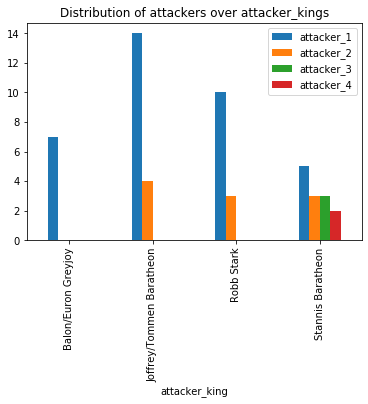

In [34]:
df[['attacker_1','attacker_2','attacker_3','attacker_4','attacker_king']].groupby(
    'attacker_king').count().plot(kind='bar',title='Distribution of attackers over attacker_kings')

### Distribution of attacker_commander,defender_commander,defender_king over attacker_king 

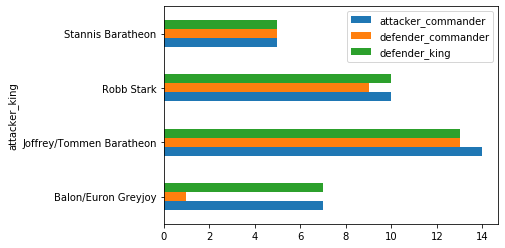

In [35]:
df[['attacker_commander','attacker_king','defender_commander','defender_king']].groupby(
    'attacker_king').count().plot(kind='barh')